# Actividad 1 31 Enero 2026
## Mateo Orozco Baldovino
## Especialidad en Estadistica Aplicada

# Caracteristicas de los datos

Este es un conjunto de datos acerca de las preferencias en dulces para los niños en halloween. Puede ser encontrado en el siguiente link.
https://www.kaggle.com/datasets/fivethirtyeight/the-ultimate-halloween-candy-power-ranking


## Variables

- chocolate: Does it contain chocolate?
- fruity: Is it fruit flavored?
- caramel: Is there caramel in the candy?
- peanutalmondy: Does it contain peanuts, peanut butter or almonds?
- nougat: Does it contain nougat?
- crispedricewafer: Does it contain crisped rice, wafers, or a cookie component?
- hard: Is it a hard candy?
- bar: Is it a candy bar?
- pluribus: Is it one of many candies in a bag or box?
- sugarpercent: The percentile of sugar it falls under within the data set.
- pricepercent: The unit price percentile compared to the rest of the set.
- winpercent: The overall win percentage according to 269,000 matchups.

## Importando Librerias

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [8]:
df = pd.read_csv("Datos\candy-data.csv", sep=",")
df.head(5)


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


### Preparación de los datos para el modelo de regresión lineal

Primero, necesitamos seleccionar las características (variables independientes) y la variable objetivo (variable dependiente). En este caso, la variable objetivo será `winpercent` (porcentaje de victorias), que representa la preferencia general de los dulces. Las características serán las propiedades de los dulces, como si contienen chocolate, si son frutales, etc., junto con `sugarpercent` y `pricepercent`.

In [9]:
# Definir las características (X) y la variable objetivo (y)
features = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat',
            'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent']
X = df[features]
y = df['winpercent']

In [10]:
# Mostrar estadísticas básicas
print(y.min(), y.max())
print(y.mean(), y.std())

22.445341 84.18029
50.316763811764716 14.71435741340785


In [11]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")

Tamaño del conjunto de entrenamiento: 68 muestras
Tamaño del conjunto de prueba: 17 muestras


### Entrenamiento del modelo de regresión lineal

Ahora, entrenaremos un modelo de regresión lineal utilizando los datos de entrenamiento.

In [12]:
# Inicializar y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

print("Modelo de regresión lineal entrenado exitosamente.")

Modelo de regresión lineal entrenado exitosamente.


### Evaluación del modelo

Evaluaremos el rendimiento del modelo utilizando el conjunto de prueba y métricas como el error cuadrático medio (MSE) y el coeficiente de determinación (R-cuadrado).

In [13]:
# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R-cuadrado): {r2:.2f}")

Error Cuadrático Medio (MSE): 160.98
Coeficiente de Determinación (R-cuadrado): 0.20


In [14]:
# Mostrar los coeficientes del modelo para entender la importancia de cada característica
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
display(coefficients.sort_values(by='Coefficient', ascending=False))

,Feature,Coefficient
0,chocolate,18.866390
9,sugarpercent,9.948579
5,crispedricewafer,8.758688
3,peanutyalmondy,8.738057
1,fruity,8.311682
4,nougat,4.494756
7,bar,0.087762
2,caramel,-0.040491
8,pluribus,-3.940221
10,pricepercent,-4.242897


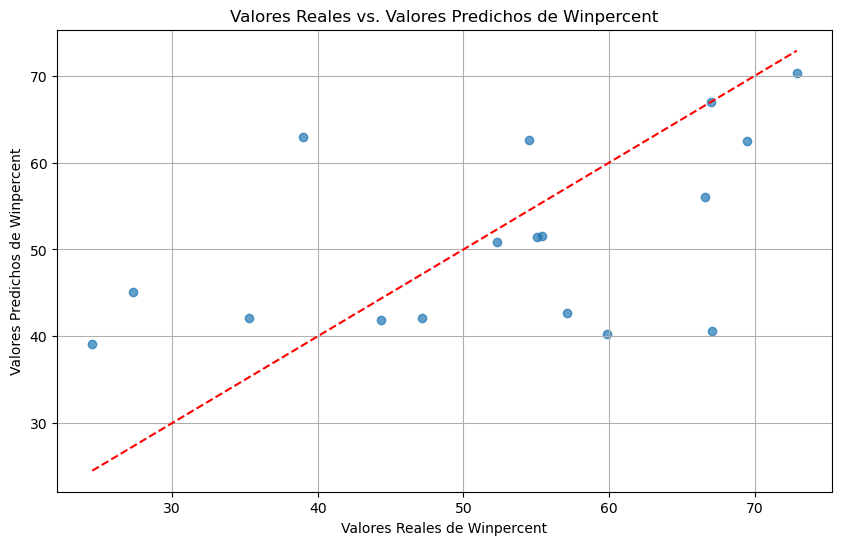

In [15]:
# Visualizar las predicciones vs los valores reales
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reales de Winpercent')
plt.ylabel('Valores Predichos de Winpercent')
plt.title('Valores Reales vs. Valores Predichos de Winpercent')
plt.grid(True)
plt.show()

### Análisis de los Resultados del Modelo de Regresión Lineal

**1. Métricas de Evaluación:**

*   **Error Cuadrático Medio (MSE):** `160.98`
    El MSE es el promedio de los cuadrados de los errores, es decir, la diferencia entre los valores predichos por el modelo y los valores reales. Un MSE más bajo indica un mejor ajuste del modelo a los datos. En este caso, un valor de 160.98 sugiere que, en promedio, las predicciones del modelo tienen una desviación considerable de los valores reales de `winpercent`.

*   **Coeficiente de Determinación (R-cuadrado):** `0.20`
    El R-cuadrado mide la proporción de la varianza en la variable dependiente (`winpercent`) que puede ser predicha por las variables independientes. Un valor de 0.20 (o 20%) indica que solo el 20% de la variabilidad en el `winpercent` puede explicarse por las características incluidas en el modelo. Esto es un R-cuadrado bastante bajo, lo que sugiere que el modelo no explica una gran parte de la variación en la preferencia de los dulces. Esto podría deberse a que faltan variables importantes, la relación no es lineal, o hay mucho ruido en los datos.

**2. Coeficientes del Modelo:**

Los coeficientes muestran la contribución de cada característica a la predicción del `winpercent`. Un coeficiente positivo indica que un aumento en la característica se asocia con un aumento en el `winpercent`, y viceversa para un coeficiente negativo. Los coeficientes se ordenaron de mayor a menor valor para una mejor interpretación:

| Feature            | Coefficient |
| :----------------- | :---------- |
| chocolate          | 18.87       |
| peanutyalmondy     | 8.74        |
| crispedricewafer   | 8.76        |
| fruity             | 8.31        |
| nougat             | 4.49        |
| sugarpercent       | 9.95        |
| bar                | 0.09        |
| caramel            | -0.04       |
| pluribus           | -3.94       |
| pricepercent       | -4.24       |
| hard               | -5.06       |

**Observaciones clave:**

*   **Características Positivas Fuertes:** El **chocolate** es la característica que más influye positivamente en el `winpercent`, con un coeficiente de 18.87. Esto significa que los dulces con chocolate son significativamente más preferidos. `sugarpercent`, `crispedricewafer`, `peanutyalmondy` y `fruity` también tienen coeficientes positivos considerables, indicando que estos atributos generalmente aumentan la preferencia.
*   **Características Negativas:** `hard`, `pricepercent` y `pluribus` tienen coeficientes negativos. Esto sugiere que los dulces duros, con un mayor porcentaje de precio y aquellos que vienen en cantidad (`pluribus`), tienden a ser menos preferidos.
*   **Influencia Baja:** `caramel` y `bar` tienen coeficientes cercanos a cero, lo que implica que tienen un impacto muy pequeño o casi insignificante en el `winpercent` dentro de este modelo.

**3. Visualización de Predicciones vs. Valores Reales:**

El gráfico de dispersión muestra los `Valores Reales de Winpercent` en el eje X y los `Valores Predichos de Winpercent` en el eje Y. La línea roja punteada representa la situación ideal donde los valores predichos son exactamente iguales a los valores reales.

*   **Distribución:** Los puntos están bastante dispersos alrededor de la línea roja, pero con una tendencia general. Si los puntos estuvieran muy cerca de la línea, el modelo sería muy preciso. La dispersión confirma el bajo R-cuadrado, indicando que hay una varianza considerable entre lo que el modelo predice y lo que realmente sucede. Algunos puntos están muy lejos de la línea, lo que sugiere que el modelo tiene dificultades para predecir con precisión ciertos dulces.

**En resumen:**

El modelo de regresión lineal ha identificado algunas características clave que influyen en la preferencia de los dulces (siendo el chocolate la más influyente). Sin embargo, el bajo R-cuadrado y la dispersión en el gráfico indican que el modelo actual solo explica una pequeña parte de la variabilidad y podría no ser el más robusto para predecir con alta precisión las preferencias. Podrían explorarse modelos más complejos, ingeniería de características adicionales o la inclusión de otras variables para mejorar su rendimiento.